Import statements

In [420]:
import pandas as pd
import numpy as np

Load the data

In [421]:
data_path = './test_data/17_compiled.csv'

df = pd.read_csv(data_path)
df.describe()

,Unnamed: 0,start_time,id,home_score,away_score,result,home_attack_strength,home_defence_strength,away_attack_strength,away_defence_strength,...,home_win,away_win,home_double,away_double,under0.5,under1.5,under2.5,under3.5,under4.5,draw
count,7427.000000,7.427000e+03,7.427000e+03,7427.000000,7427.000000,7427.000000,7427.000000,7427.000000,7427.000000,7427.000000,...,7427.000000,7427.000000,7427.000000,7427.000000,7427.000000,7427.000000,7427.000000,7427.000000,7427.000000,7427.000000
mean,183.784570,1.374058e+09,4.277013e+06,1.518648,1.162784,1.791975,0.944246,0.941432,0.941411,0.943328,...,0.456443,0.295274,0.704726,0.543557,0.078767,0.255015,0.493066,0.712266,0.867376,0.248283
std,107.109411,1.831646e+08,3.660945e+06,1.303529,1.150428,0.813434,0.503392,0.499868,0.536468,0.474306,...,0.498133,0.456197,0.456197,0.498133,0.269392,0.435899,0.499986,0.452737,0.339191,0.432046
min,0.000000,1.061032e+09,4.004600e+04,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,91.000000,1.218979e+09,7.815145e+05,1.000000,0.000000,1.000000,0.675676,0.647994,0.615741,0.675676,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,184.000000,1.377353e+09,3.964819e+06,1.000000,1.000000,2.000000,0.895522,0.944206,0.898876,0.954545,...,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
75%,277.000000,1.535206e+09,7.827906e+06,2.000000,2.000000,2.000000,1.191481,1.230637,1.245847,1.212890,...,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
max,369.000000,1.693150e+09,1.135252e+07,9.000000,9.000000,3.000000,5.000000,5.000000,5.217391,5.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Drop the id and index (usually called 'Unnamed: 0') columns

I have also included the result column because it has been brocken down into multiple other outcomes.
What I mean is it has been one-hot encoded to represent (home_win , away_win , and a draw) and also represent goals like under0.5 and the like

In [422]:
useless_columns = ['id' , 'Unnamed: 0' , 'result' , 'home_team' , 'away_team' , 'home_score'  , 'away_score' , 'start_time']

df = df.drop(columns=useless_columns)

Check if there are any null values

In [423]:
df.isna().sum()

home_attack_strength     0
home_defence_strength    0
away_attack_strength     0
away_defence_strength    0
home_score_avg           0
away_score_avg           0
home_expected_goal       0
away_expected_goal       0
home_elo                 0
away_elo                 0
1                        0
2                        0
x                        0
12                       0
1x                       0
2x                       0
ov0.5                    0
un0.5                    0
ov1.5                    0
un1.5                    0
ov2.5                    0
un2.5                    0
ov3.5                    0
un3.5                    0
ov4.5                    0
un4.5                    0
num_home_games           0
num_away_games           0
home_win                 0
away_win                 0
home_double              0
away_double              0
under0.5                 0
under1.5                 0
under2.5                 0
under3.5                 0
under4.5                 0
d

Check the data type of each column

In [424]:
df.dtypes

home_attack_strength     float64
home_defence_strength    float64
away_attack_strength     float64
away_defence_strength    float64
home_score_avg           float64
away_score_avg           float64
home_expected_goal       float64
away_expected_goal       float64
home_elo                 float64
away_elo                 float64
1                        float64
2                        float64
x                        float64
12                       float64
1x                       float64
2x                       float64
ov0.5                    float64
un0.5                    float64
ov1.5                    float64
un1.5                    float64
ov2.5                    float64
un2.5                    float64
ov3.5                    float64
un3.5                    float64
ov4.5                    float64
un4.5                    float64
num_home_games           float64
num_away_games           float64
home_win                   int64
away_win                   int64
home_doubl

Split the data into training and testing set inorder to avoid data leakage

In [425]:
from sklearn.model_selection import train_test_split

In [426]:
target_cols = ['home_win' , 'draw' , 'away_win']
features = [column for column in df.columns if column not in target_cols]

# convert the data into features(predictors) and tragets
X = df[features]
y = df[target_cols]

# split the data into training and testing
X_train , X_test , y_train , y_test = train_test_split(X , y , random_state=0 , test_size=0.3)


Remove columns that can't be possibely obtained before the match.

i.e other potential target columns , but aren't selected to be a target so remove them

In [427]:
outcome_cols = ['home_win','draw' , 'away_win','home_double' , 'away_double' , 'under0.5' , 'under1.5' , 'under2.5' , 'under3.5' , 'under4.5']
to_be_removed = [column for column in outcome_cols if column not in target_cols]

X_train = X_train.drop(columns=to_be_removed)
X_test = X_test.drop(columns=to_be_removed)

Let is remove constant features

This are features that have no variance in them. Simply put they have similar values for all of the data hence have variance of 0 which in turn leads the feature to not give information

In [428]:
from sklearn.feature_selection import VarianceThreshold

In [429]:
# initialize a selector to identify values with variance of 0
selector = VarianceThreshold(threshold=0)

# fit the selector over the data
selector.fit(X_train)

VarianceThreshold(threshold=0)

In [430]:
selected_featuers = X_train.columns[selector.get_support()]

Now let us remove the constant features from the data

In [431]:
X_train_t = selector.transform(X_train)
X_test_t = selector.transform(X_test)

Converting the numpy array into pandas dataframe

In [432]:
X_train_t = pd.DataFrame(X_train_t , columns=selector.get_feature_names_out())
X_test_t = pd.DataFrame(X_test_t , columns=selector.get_feature_names_out())

In [433]:
X_train_t.columns

Index(['home_attack_strength', 'home_defence_strength', 'away_attack_strength',
       'away_defence_strength', 'home_score_avg', 'away_score_avg',
       'home_expected_goal', 'away_expected_goal', 'home_elo', 'away_elo', '1',
       '2', 'x', '12', '1x', '2x', 'ov0.5', 'un0.5', 'ov1.5', 'un1.5', 'ov2.5',
       'un2.5', 'ov3.5', 'un3.5', 'ov4.5', 'un4.5', 'num_home_games',
       'num_away_games'],
      dtype='object')

Now let us drop the Quasi-Constant Features

This are features that have the identical values for large percentage of the data


In [434]:
selector_quasi = VarianceThreshold(threshold=0.1)
selector_quasi.fit(X_train_t)

VarianceThreshold(threshold=0.1)

In [435]:
X_train_t.columns[selector_quasi.get_support()]

Index(['home_attack_strength', 'home_defence_strength', 'away_attack_strength',
       'away_defence_strength', 'home_expected_goal', 'away_expected_goal',
       'home_elo', 'away_elo', 'num_home_games', 'num_away_games'],
      dtype='object')

In [436]:
X_train_quasi = selector_quasi.transform(X_train_t)
X_test_quasi = selector_quasi.transform(X_test_t)

In [437]:
X_train_quasi = pd.DataFrame(X_train_quasi , columns=selector_quasi.get_feature_names_out())
X_test_quasi = pd.DataFrame(X_test_quasi , columns=selector_quasi.get_feature_names_out()) 

In [438]:
X_test_quasi.columns

Index(['home_attack_strength', 'home_defence_strength', 'away_attack_strength',
       'away_defence_strength', 'home_expected_goal', 'away_expected_goal',
       'home_elo', 'away_elo', 'num_home_games', 'num_away_games'],
      dtype='object')

Understand the correlation between predictors

In [439]:
correlation_matrix = X_train_quasi.corr(method='pearson')

In [440]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

<Axes: >

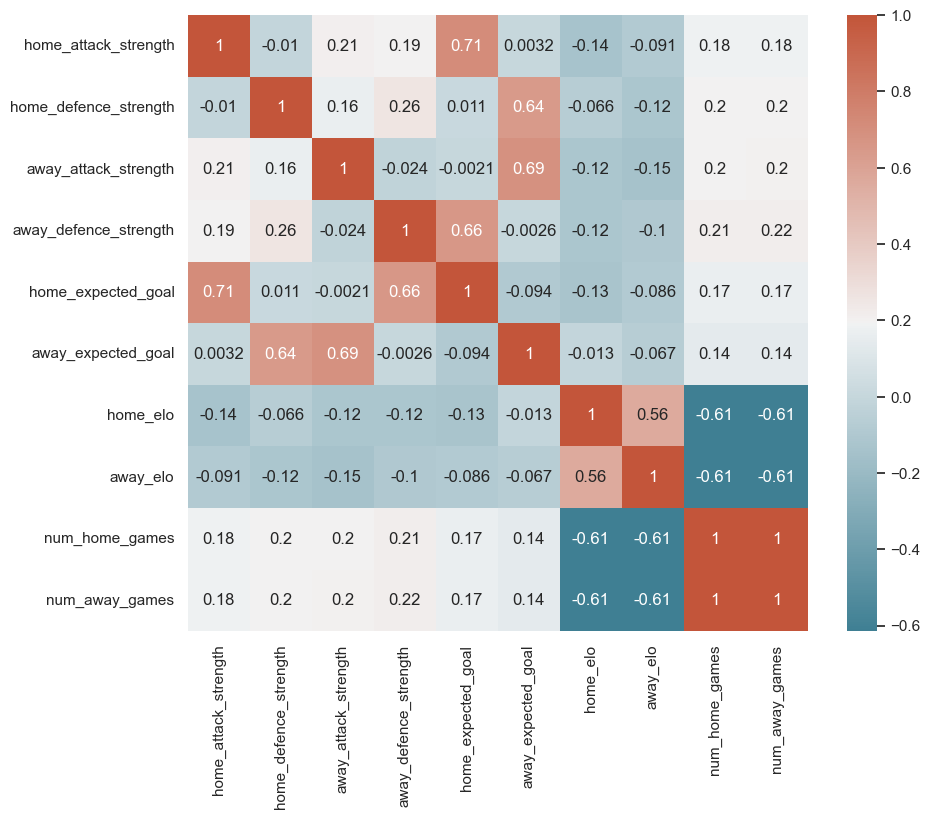

In [441]:
fig, ax = plt.subplots()
fig.set_size_inches(10, 8)
cmap = sns.diverging_palette(220, 20, as_cmap=True)
sns.heatmap(correlation_matrix, cmap=cmap, annot=True)

There aren't that much correlated features , the max correlation is about 0.71. It is quite big but not enough to remove one of the features.

### Now let us select features based using filter methods

1. Annova

In [442]:
from sklearn.feature_selection import f_classif , SelectFpr , SelectKBest

In [443]:
variables = list(X_train_quasi.columns)
variables

['home_attack_strength',
 'home_defence_strength',
 'away_attack_strength',
 'away_defence_strength',
 'home_expected_goal',
 'away_expected_goal',
 'home_elo',
 'away_elo',
 'num_home_games',
 'num_away_games']

Let is plot a histogram for all of the predictors , to check:

- Are they normally distributed
- Are the observations independent(Don't how I can see it from the histogram)
- The variance in each group is similar

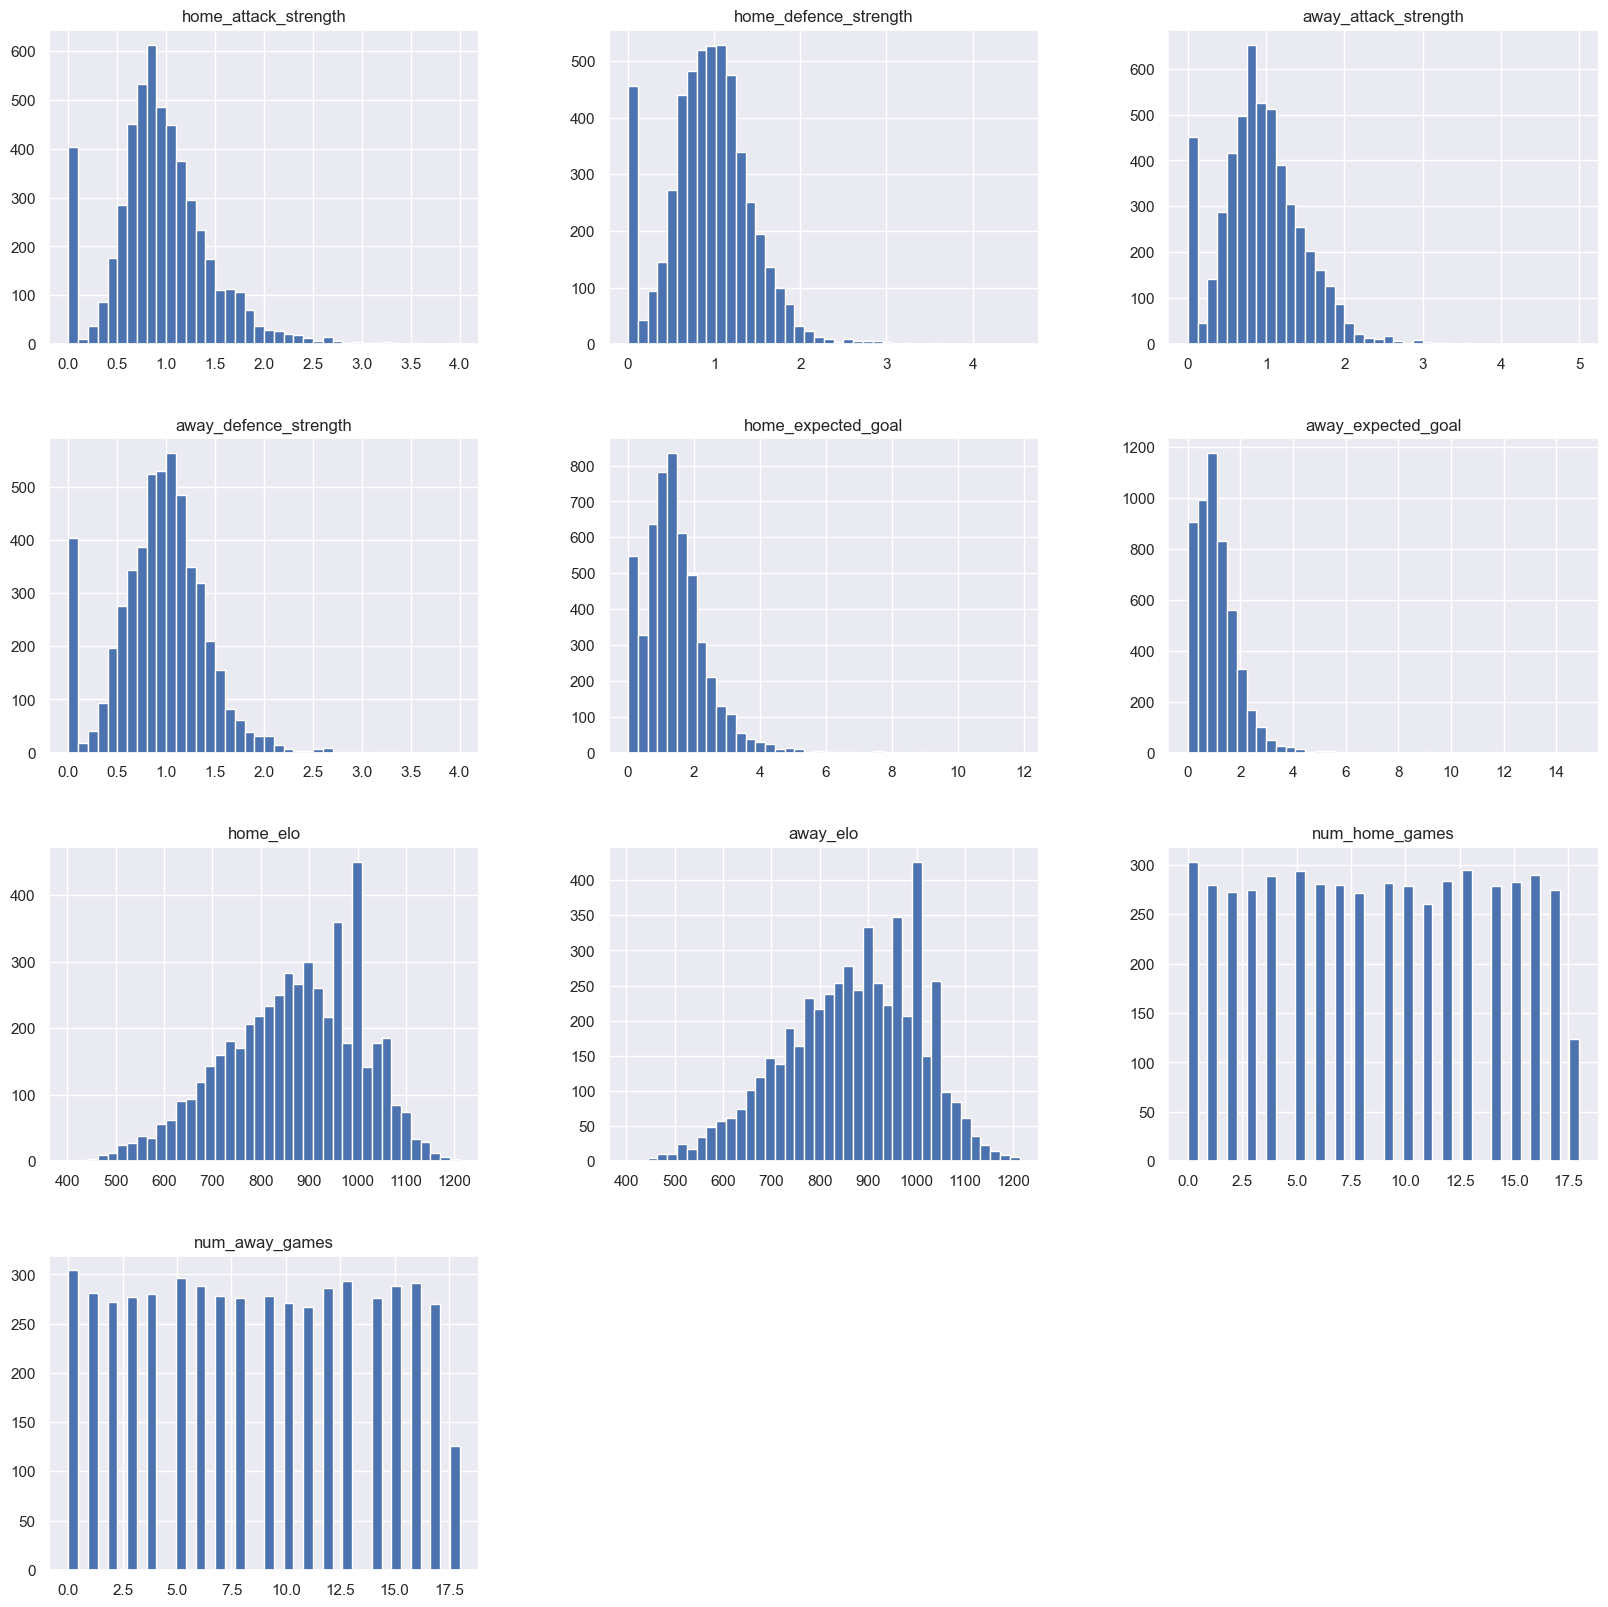

In [444]:
X_train_quasi.hist(bins=40 , figsize=(20,20))
plt.show()

We can see that only 'home_elo' and 'away_elo' some what fulfill the criterias , but let us just implement ANOVA anyaways

In [445]:
# the function returns two arrays that contain arrays
# the first array contains the F-ratio and the second array contains p-values

univariate_home_win = f_classif(X_train_quasi , y_train['home_win'])
univariate_draw = f_classif(X_train_quasi , y_train['draw'])
univariate_away_win = f_classif(X_train_quasi , y_train['away_win'])

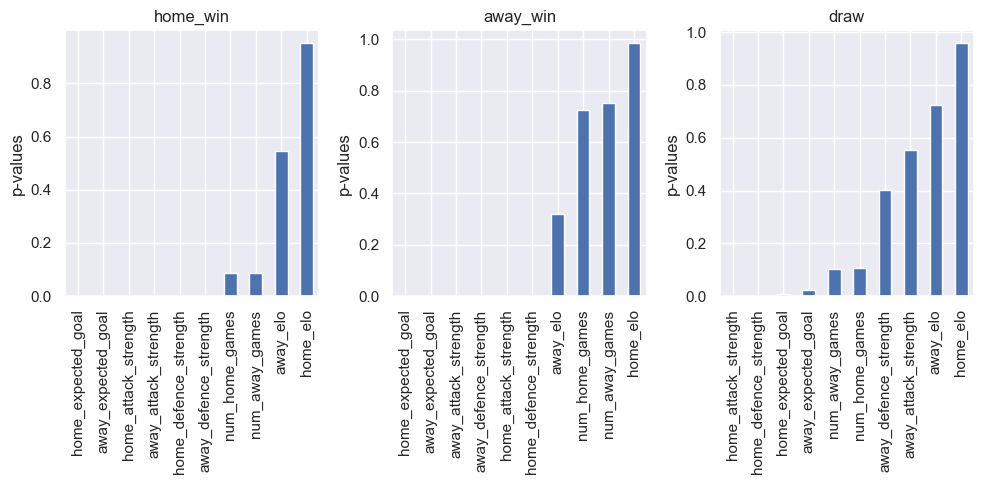

In [446]:
# Assuming you have defined univariate_home_win, univariate_away_win, and univariate_draw

univariates = [pd.Series(univariate_home_win[1]),
               pd.Series(univariate_away_win[1]),
               pd.Series(univariate_draw[1])]

titles = ['home_win' , 'away_win' , 'draw']


# Create subplots
fig, axes = plt.subplots(1, len(univariates), figsize=(10, 5))

# Flatten the axes array
axe = axes.ravel()

for i, univariate in enumerate(univariates):
    univariate.index = X_train_quasi.columns
    univariate.sort_values(ascending=True).plot.bar(rot=90, ax=axe[i])
    axe[i].set_ylabel("p-values")
    axe[i].set_title(titles[i])

plt.tight_layout()  # Adjust spacing
plt.show()


We can see that for most of the features we have the p-values are less than 0.05 , but for 'num_home_games' , 'num_away_games' , 'home_elo' and 'away_elo' the p-values are really high. That means they aren't really predictive.

In [447]:
predictive = list(X_train_quasi.columns)

Below we can plot the distribution of the target class for a features whose p-value was smaller than 0.05

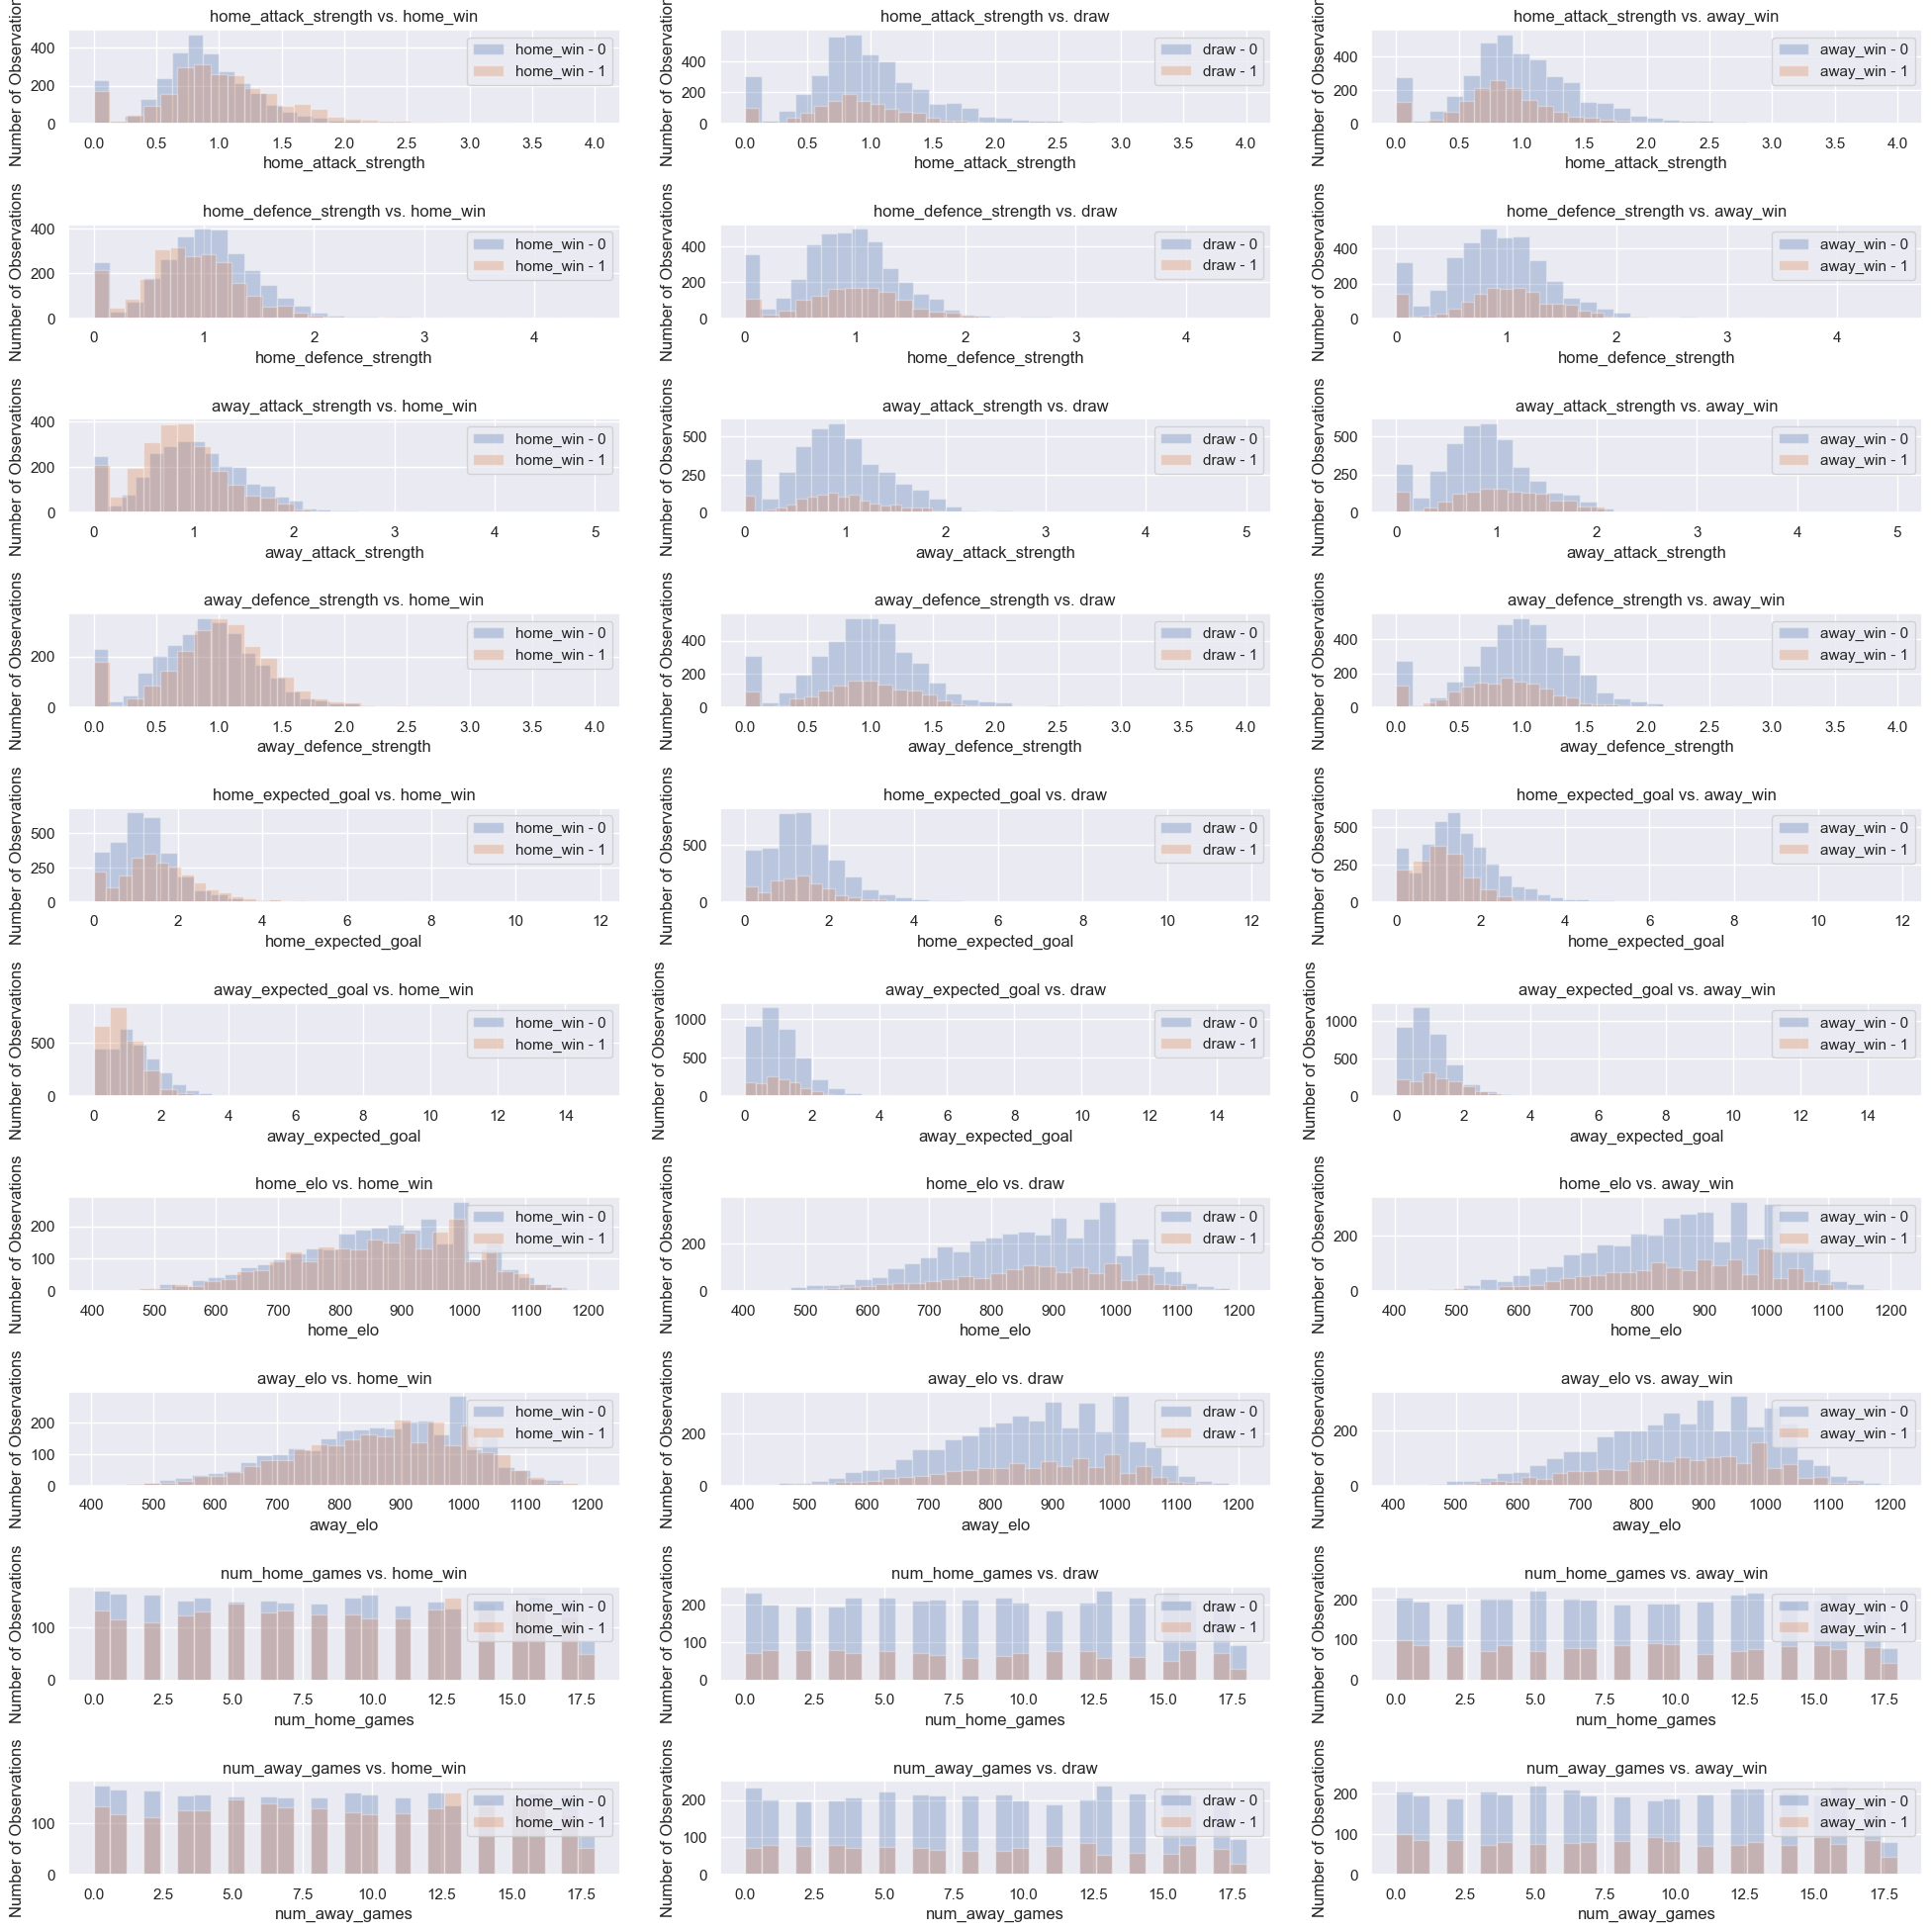

In [448]:
targets = list(y_train.columns)

n_rows, n_cols = len(predictive), len(targets)
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 20))

# Iterate over features and targets
for i, feature in enumerate(predictive):
    for j, target in enumerate(targets):
        y = y_train[target]
        y = np.reshape(y, (-1, 1))

        sample1 = X_train_quasi.loc[y == 0, feature]
        sample2 = X_train_quasi.loc[y == 1, feature]

        # Plot histograms in the corresponding subplot
        axes[i, j].hist(sample1, bins=30, alpha=0.3, label=f"{target} - 0")
        axes[i, j].hist(sample2, bins=30, alpha=0.3, label=f"{target} - 1")
        axes[i, j].set_title(f"{feature} vs. {target}")
        axes[i, j].set_xlabel(feature)
        axes[i, j].set_ylabel("Number of Observations")
        axes[i, j].legend(loc="upper right")

# Adjust spacing between subplots
plt.tight_layout(pad=2)

# Show the entire plot
plt.show()


Now let us select features who's p-values are less than 0.05

In [449]:
sel = SelectFpr(f_classif , alpha=0.05).fit(X_train_quasi , y_train['away_win'])

In [450]:
# features selected using ANOVA
features = sel.get_feature_names_out()

X_train_final = X_train_quasi[features]
X_test_final = X_train_quasi[features]

In [451]:
X_train_final.columns

Index(['home_attack_strength', 'home_defence_strength', 'away_attack_strength',
       'away_defence_strength', 'home_expected_goal', 'away_expected_goal'],
      dtype='object')